In [87]:
import pandas as pd
from matplotlib import pyplot as plt

from utils.metrics import execution_metrics, results_distribution, plot_metrics, plot_results_distribution
from utils.persistent import load_direct_result, load_smcdel_result, NameInfo
from sklearn import metrics as sk_metrics
from sklearn.preprocessing import OneHotEncoder

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metrics

In [88]:
direct_result = load_direct_result(name_info=NameInfo(
    model_name="gpt-3.5-turbo-0125",
    sample_size=200
))
with_sf_result = load_smcdel_result(name_info=NameInfo(
    model_name="gpt-3.5-turbo-0125",
    sample_size=200,
))
direct_fine_tuning_result = load_direct_result(name_info=NameInfo(
    model_name="ft:gpt-3.5-turbo-0125:personal:withoutsf:9A3WQ1Ca",
    sample_size=200
))
with_sf_fine_tuning_result = load_smcdel_result(name_info=NameInfo(
    model_name="ft:gpt-3.5-turbo-0125:personal:withsf:9A3TMeFR",
    sample_size=200,
))

In [89]:
direct_metrics = execution_metrics(direct_result)  # pd.Series
with_sf_metrics = execution_metrics(with_sf_result)
direct_fine_tuning_metrics = execution_metrics(direct_fine_tuning_result)
with_sf_fine_tuning_metrics = execution_metrics(with_sf_fine_tuning_result)
metrics = pd.concat([
    direct_metrics,
    with_sf_metrics,
    direct_fine_tuning_metrics,
    with_sf_fine_tuning_metrics
], axis=0)
metrics.index = ["DP", "SFGP", "DP_FT", "ToM-LM"]
metrics

,execution_accuracy,f1,auc,execution_rate
DP,0.58,0.558026,0.5825,0.995
SFGP,0.49,0.515317,0.6000,0.780
DP_FT,0.76,0.755874,0.7600,1.000
ToM-LM,0.91,0.935899,0.9375,0.945


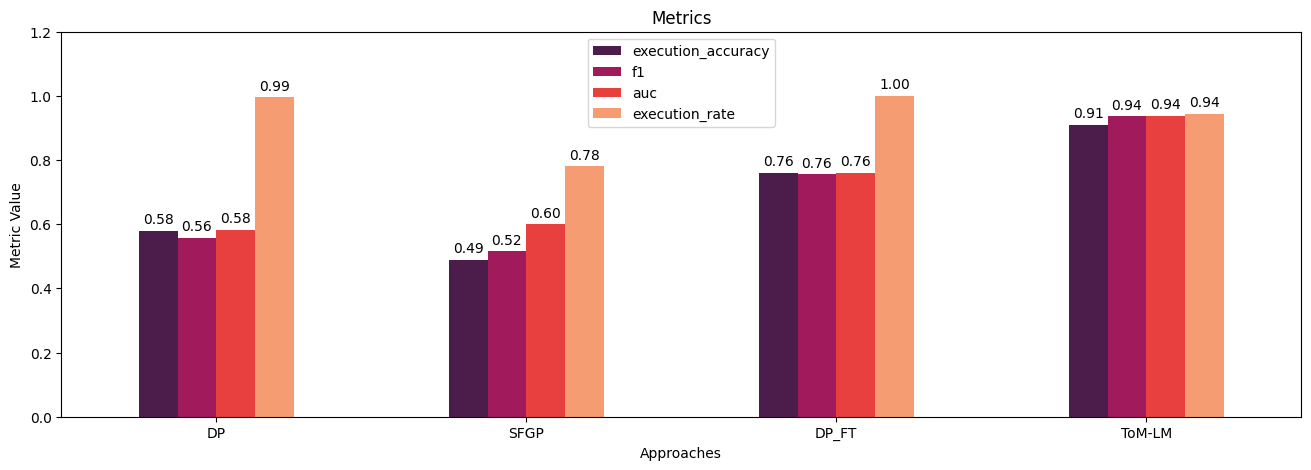

In [90]:
plot_metrics(metrics)

# Results distribution

In [91]:
direct_results_distribution = results_distribution(direct_result)
with_sf_results_distribution = results_distribution(with_sf_result)
direct_fine_tuning_results_distribution = results_distribution(direct_fine_tuning_result)
with_sf_fine_tuning_results_distribution = results_distribution(with_sf_fine_tuning_result)
distribution = pd.DataFrame({
    "DP": direct_results_distribution,
    "SFGP": with_sf_results_distribution,
    "DP_FT": direct_fine_tuning_results_distribution,
    "ToM-LM": with_sf_fine_tuning_results_distribution
}).T
distribution

predicted_label,1,0,-1
DP,0.73,0.265,0.005
SFGP,0.63,0.150,0.220
DP_FT,0.63,0.370,0.000
ToM-LM,0.50,0.445,0.055


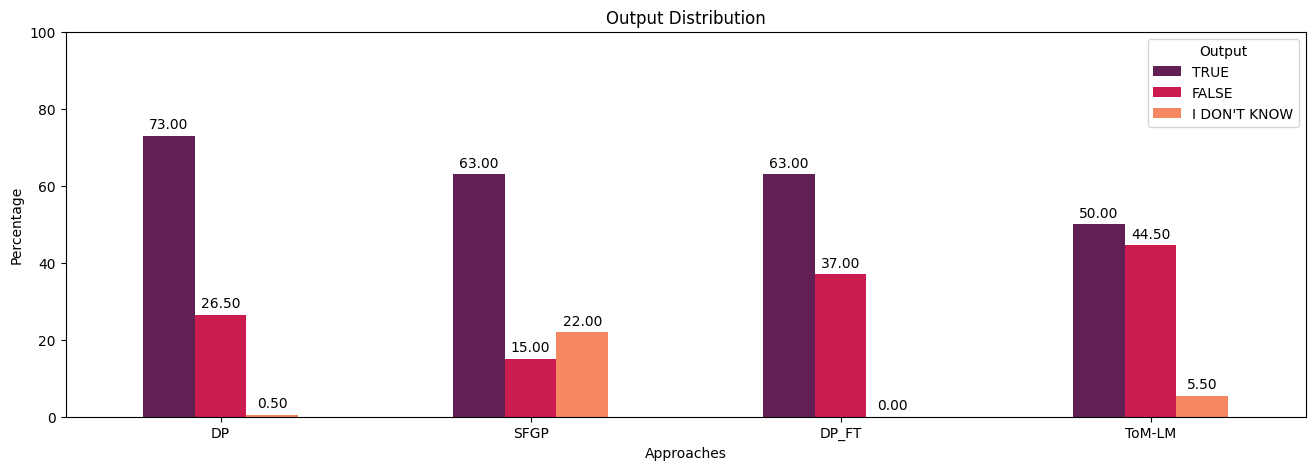

In [92]:
plot_results_distribution(distribution)